In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
# Import 30 years of daily data
data_string = "hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/"
lautoka_data = pd.read_csv(data_string + "lautoka_daily.csv")

In [3]:
# Convert date column to datetime from object
lautoka_data["date"] = pd.to_datetime(lautoka_data.date)

In [4]:
lautoka_data["day_of_year"] = lautoka_data.date.dt.dayofyear

In [5]:
# Only include years where 50% of each month is present (check how much data this removes)
# Add analysis to remove years with a significant proportion of NaN values
# Group by month-year and check the number of days available in each month-year
lautoka_data["Y_M"] = lautoka_data.date.dt.to_period('M')
lautoka_data_no_nan = lautoka_data.daily_rainfall_mm.dropna().groupby(lautoka_data.Y_M).count()
lautoka_data_totals = lautoka_data.daily_rainfall_mm.groupby(lautoka_data.Y_M).count()

In [6]:
frac = lautoka_data_no_nan/lautoka_data_totals
sum(frac > 0.5)

396

In [7]:
len(lautoka_data_totals)

396

In [8]:
# As the total number of months in the period is equal to the number of months where the NaN values make up less 
# than 50% of the data, no years need to be removed.

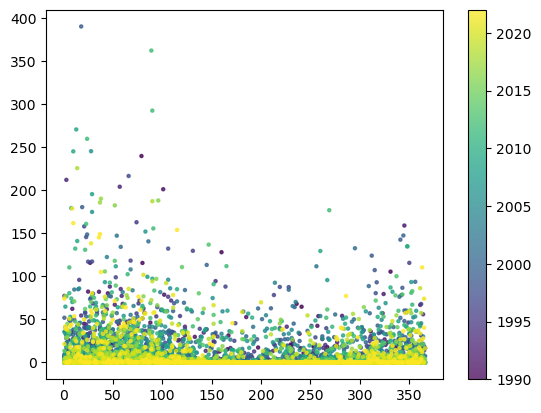

In [9]:
# Group data by day of year to get 30 representative annual cycles
plt.scatter(lautoka_data.day_of_year, lautoka_data.daily_rainfall_mm, c=lautoka_data.date.dt.year, s=5, alpha=0.75)
plt.colorbar()

<Axes: xlabel='date'>

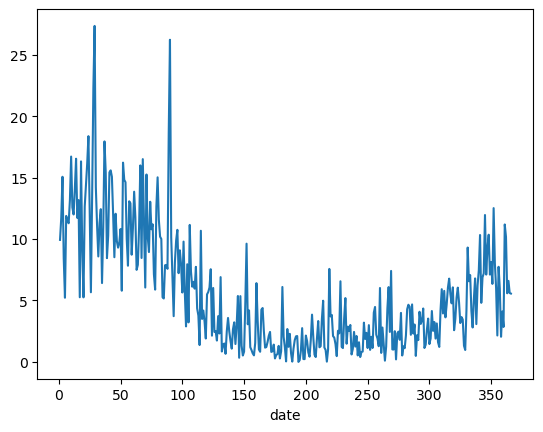

In [10]:
lautoka_data.daily_rainfall_mm.groupby(lautoka_data.date.dt.dayofyear).mean().plot()

In [11]:
min(lautoka_data[lautoka_data.daily_rainfall_mm > 0].daily_rainfall_mm.dropna())

0.1

In [12]:
np.percentile(lautoka_data[lautoka_data.daily_rainfall_mm > 0].daily_rainfall_mm.dropna(), (0.1, 1., 5., 25., 50., 75., 95., 99., 99.9))

array([1.000000e-01, 1.000000e-01, 2.000000e-01, 1.500000e+00,
       6.000000e+00, 1.985000e+01, 6.414000e+01, 1.392820e+02,
       2.590496e+02])

In [13]:
# Filter by > 0 and get ~0.1 lower cutoff (and remove NA values)
lautoka_data_rainy = lautoka_data[lautoka_data.daily_rainfall_mm > 0.]
lautoka_data_rainy

,date,daily_rainfall_mm,accumulation_period_days,day_of_year,Y_M
3,1990-01-04,18.4,1.0,4,1990-01
4,1990-01-05,16.9,1.0,5,1990-01
5,1990-01-06,49.8,1.0,6,1990-01
8,1990-01-09,0.4,1.0,9,1990-01
12,1990-01-13,1.2,1.0,13,1990-01
...,...,...,...,...,...
12048,2022-12-27,15.0,1.0,361,2022-12
12049,2022-12-28,3.5,1.0,362,2022-12
12050,2022-12-29,110.5,1.0,363,2022-12
12051,2022-12-30,28.0,1.0,364,2022-12


(array([2.692e+03, 5.560e+02, 3.500e+02, 1.630e+02, 1.120e+02, 5.800e+01,
        4.300e+01, 1.900e+01, 1.600e+01, 8.000e+00, 1.200e+01, 9.000e+00,
        5.000e+00, 5.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e-01, 1.31166667e+01, 2.61333333e+01, 3.91500000e+01,
        5.21666667e+01, 6.51833333e+01, 7.82000000e+01, 9.12166667e+01,
        1.04233333e+02, 1.17250000e+02, 1.30266667e+02, 1.43283333e+02,
        1.56300000e+02, 1.69316667e+02, 1.82333333e+02, 1.95350000e+02,
        2.08366667e+02, 2.21383333e+02, 2.34400000e+02, 2.47416667e+02,
        2.60433333e+02, 2.73450000e+02, 2.86466667e+02, 2.99483333e+02,
        3.12500000e+02, 3.25516667e+02, 3.38533333e+02, 3.51550000e+02,
        3.64566667e+02, 3.77583333e+02, 3.90600000e+02]),
 <BarContainer object of 30 artists>)

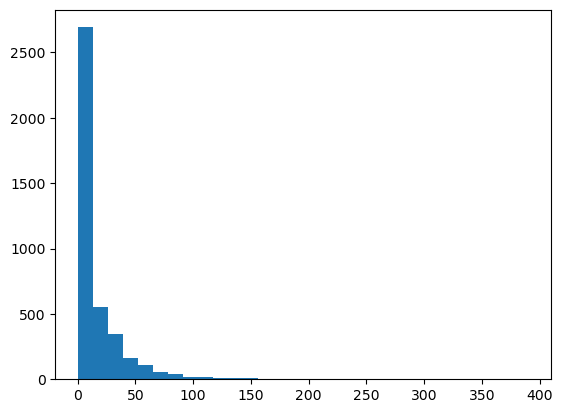

In [14]:
plt.hist(lautoka_data_rainy.daily_rainfall_mm, bins=30)

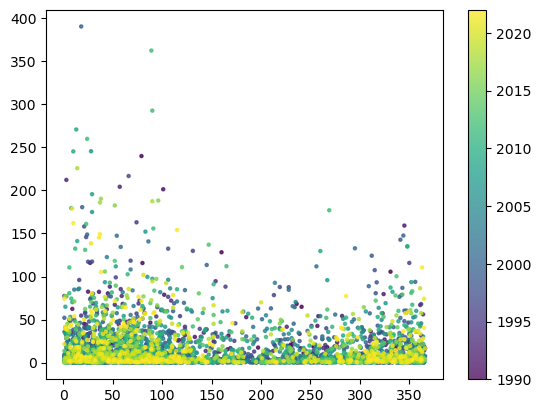

In [15]:
# Filter data by wet day
plt.scatter(lautoka_data_rainy.day_of_year, lautoka_data_rainy.daily_rainfall_mm, c=lautoka_data_rainy.date.dt.year, s=5, alpha=0.75)
plt.colorbar()

In [16]:
# Now that data has been cleaned, calculate and plot descriptive statistics for rainy data
# Do this to get the annual cycle and percentiles of rain for a typical year (mean, 1, 5, 25, 50, 75, 95, 99)

In [17]:
lautoka_rainy_avg = lautoka_data_rainy.daily_rainfall_mm.groupby(lautoka_data.date.dt.dayofyear).mean()
lautoka_rainy_1 = lautoka_data_rainy.daily_rainfall_mm.groupby(lautoka_data.date.dt.dayofyear).quantile(0.01)
lautoka_rainy_5 = lautoka_data_rainy.daily_rainfall_mm.groupby(lautoka_data.date.dt.dayofyear).quantile(0.05)
lautoka_rainy_25 = lautoka_data_rainy.daily_rainfall_mm.groupby(lautoka_data.date.dt.dayofyear).quantile(0.25)
lautoka_rainy_50 = lautoka_data_rainy.daily_rainfall_mm.groupby(lautoka_data.date.dt.dayofyear).quantile(0.5)
lautoka_rainy_75 = lautoka_data_rainy.daily_rainfall_mm.groupby(lautoka_data.date.dt.dayofyear).quantile(0.75)
lautoka_rainy_95 = lautoka_data_rainy.daily_rainfall_mm.groupby(lautoka_data.date.dt.dayofyear).quantile(0.95)
lautoka_rainy_99 = lautoka_data_rainy.daily_rainfall_mm.groupby(lautoka_data.date.dt.dayofyear).quantile(0.99)

In [18]:
# Get model output for comparison
uk_model_output = pd.read_csv("hk25-AusNode-ExtremePrecipitation/Data/Model_Daily/Fiji/u_Lautoka_daily.csv")
german_model_output = pd.read_csv("hk25-AusNode-ExtremePrecipitation/Data/Model_Daily/Fiji/g_Lautoka_daily.csv")

In [24]:
uk_model_output.datetime = pd.to_datetime(uk_model_output.datetime)
german_model_output.datetime = pd.to_datetime(german_model_output.datetime)

In [25]:
uk_model_output["day_of_year"] = uk_model_output.datetime.dt.dayofyear
uk_model_output_rainy = uk_model_output[uk_model_output.rain_24h_mm > 0]
min(uk_model_output_rainy.rain_24h_mm)

0.0034332275

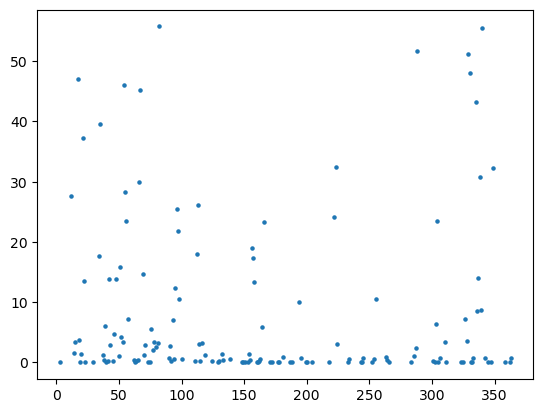

In [26]:
plt.scatter(uk_model_output_rainy.day_of_year, uk_model_output_rainy.rain_24h_mm, s=5)

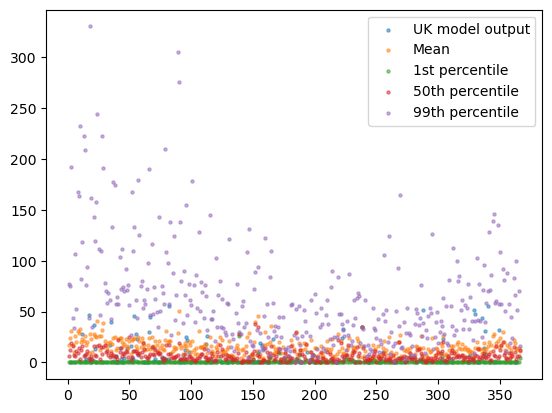

In [27]:
plt.scatter(uk_model_output_rainy.day_of_year, uk_model_output_rainy.rain_24h_mm, s=5, alpha=0.5)

plt.scatter(lautoka_rainy_avg.index, lautoka_rainy_avg.values, s=5, alpha=0.5)
plt.scatter(lautoka_rainy_1.index, lautoka_rainy_1.values, s=5, alpha=0.5)
#plt.plot(lautoka_rainy_5)
#plt.plot(lautoka_rainy_25)
plt.scatter(lautoka_rainy_50.index, lautoka_rainy_50.values, s=5, alpha=0.5)
#plt.plot(lautoka_rainy_75)
#plt.plot(lautoka_rainy_95)
plt.scatter(lautoka_rainy_99.index, lautoka_rainy_99.values, s=5, alpha=0.5)
plt.legend(["UK model output", "Mean", "1st percentile", "50th percentile", "99th percentile"])

# Plot model output in this plot 

In [ ]:
# Plot every 10th day as well as 7 day rolling averages
# Resample to do so and compare to model data (in plots above and below)

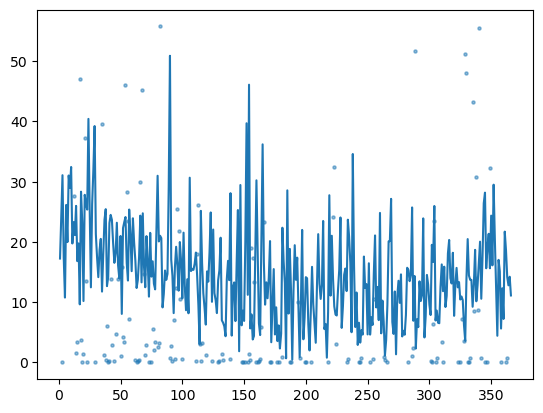

In [385]:
plt.plot(lautoka_rainy_avg)
plt.scatter(uk_model_output_rainy.day_of_year, uk_model_output_rainy.rain_1h_mm, s=5, alpha=0.5)

In [4]:
# Also plot monthly averages annually (account for NaN values)

# Shaded quartiles and model data 

# See Andrew King's paper

In [299]:
# Also plot pdfs of annual data (and KDE?)

In [ ]:
# 95th percentile across all years (come back to this) 